# CENG414 Assignment 3

### Due: June 5, Monday-23:55

### Submission and Grading Policy

- Submit your assignments to the corresponding assignment link in https://odtuclass.metu.edu.tr.
- Solutions should be submitted in a single **ipynb** file named: metu-username_HW3.ipynb (e.g., “e123456_HW3.ipynb”).
<!-- - Do not change variable names in the code blocks and the texts in the markdowns. -->
- **This is an individual assignment. You have to adhere to the academic integrity principles.**
- You are supposed to be able to interpret your findings. Hence, you shouldn't just find a number or result and just leave it. You need to comment on your findings by giving as much as **necessary** details.

**Q1.(35).** Generate k-means models for k= 2, 3, 4, 5, 6, 7, 8, 9, and 10. Determine the optimal value of k by looking at the wss graph and silhouette scores.   

**Q2.(35).** Generate DBSCAN models for epsilon values between 0.1 (included) and 2.5(included) incrementing it with steps=0.10 and for min_samples=5, 10, 15 and 20. Find the optimal value of k by adjusted rand scores. (While calculating adjusted rand scores, you will need true labels. Please see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score)   

**Q3.(30).** Plot the clusters for only the optimal k values based on predicted clusters that you obtain Task1 and Task2. Plot the original data based on the true labels. Did you obtain the same optimal k values in Task1 and Task2? Comment on the quality of the clusters that you obtained in Task1 and Task2. Can we predict the true label of the data by using clustering? Which algorithm gave a better result? What could be the reason one of them outperforms in different cases?


**Do not forget to use random_state and seeds for reproducibility.** 

In [1]:
#imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
dataset = pd.read_csv(r'/Users/deryatinmaz/Desktop/data.csv') #dataset import
X = dataset.iloc[:, [0, 1]].values # take x0 and x1 only for clustering algorithms
labels_true = dataset.iloc[:, 2].values #true labels

## Question-1: K-Means Models

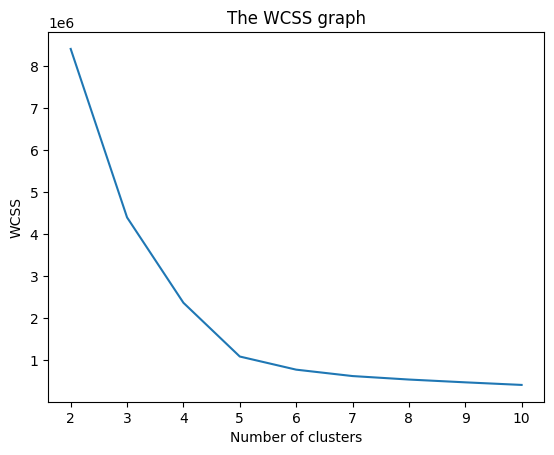

In [2]:
wcss = [] 
for i in range(2, 11): 
    kmeans = KMeans(n_clusters = i,random_state=0)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_) 
    #sum of the distances of all points within a cluster from the centroid of the point
    
plt.plot(range(2, 11), wcss) 
plt.title('The WCSS graph')
plt.xlabel('Number of clusters') 
plt.ylabel('WCSS') 
plt.show() 

* The elbow method is a technique used to determine the optimal number of clusters in a dataset by plotting the number of clusters against the corresponding variation explained and identifying the "elbow" point where the gain in performance diminishes.
* The optimal value of k is 5 by looking at the WSS graph using the elbow method.

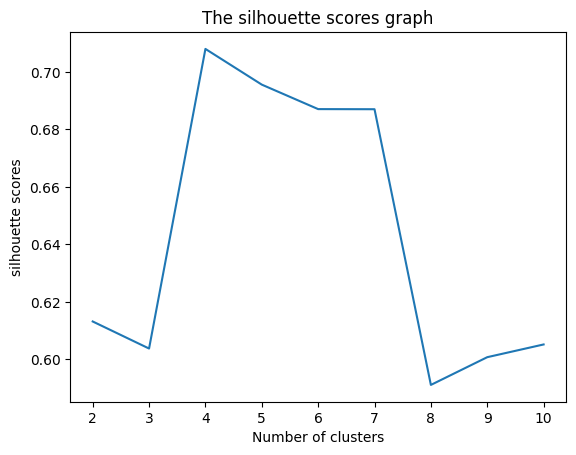

In [3]:
silhouette_scores = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters = k,random_state=0).fit(X)
  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(X, labels, metric = 'euclidean'))

plt.plot(range(2, 11), silhouette_scores) 
plt.title('The silhouette scores graph')
plt.xlabel('Number of clusters') 
plt.ylabel('silhouette scores') 
plt.show() 

* The silhouette score is a measure that quantifies how well each data point in a clustering result fits with its assigned cluster. It is a single value ranging from -1 to 1, where a higher score indicates better clustering quality.
* The optimal value of k is 4  which has the largest silhouette score by looking at the silhouette scores graph.

## Question-2: DBSCAN Models

In [4]:
adjusted_rand_scores = []
results = []

for j in range (1,5): # min_samples = 5, 10, 15 and 20
    for i in range(1,26): # epsilon values between 0.1 (included) and 2.5(included) incrementing it with steps=0.10
        clusters = DBSCAN(eps = (i/10.0), min_samples = j*5).fit(X)
        labels = clusters.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        adjusted_rand_scores.append(adjusted_rand_score(labels_true, labels))
        results.append([i/10.0, j*5, n_clusters_,adjusted_rand_score(labels_true, labels)])
        
max_score= max(adjusted_rand_scores)
max_score_index =  adjusted_rand_scores.index(max_score)
print(max_score)
print(results[max_score_index])

0.9355774741142193
[2.5, 5, 7, 0.9355774741142193]


* The adjusted Rand score is a measure used to evaluate the similarity between two sets of clusterings. It takes into account both the agreements and disagreements between the cluster assignments and provides a single value that ranges from -1 to 1, where a higher score indicates a better similarity between the clusterings.
* The optimal k value is 7 with the maximum adjusted rand score 0.9355774741142193 and paremeters: eps = 2.5, min_samples = 5 

## Question-3:

### K-Means with optimal k=5 according to WSS graph:

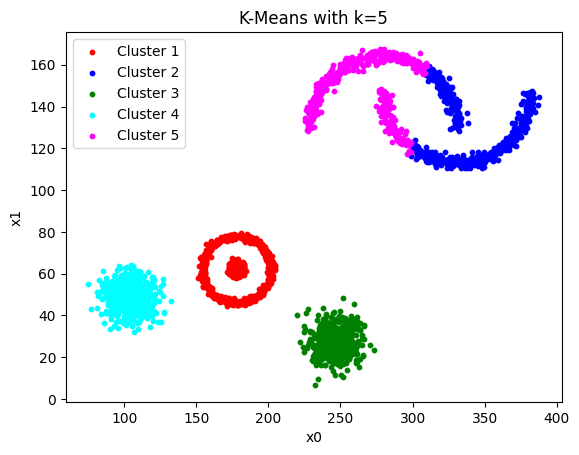

In [5]:
kmeans = KMeans(n_clusters = 5,random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.scatter( X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1') 
plt.scatter( X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter( X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3') 
plt.scatter( X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4') 
plt.scatter( X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5') 

plt.title('K-Means with k=5')
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

### K-Means with optimal k=4 according to silhouette scores:

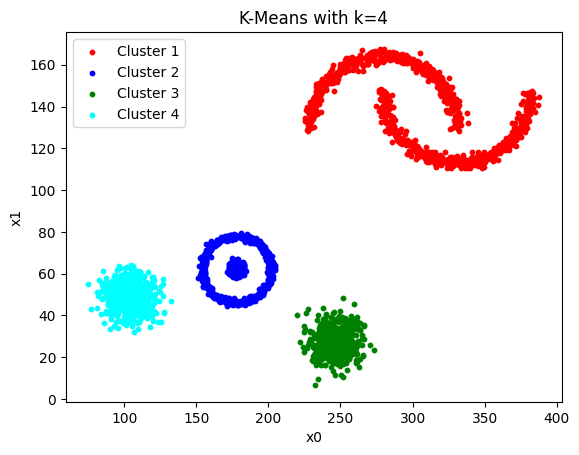

In [6]:
kmeans = KMeans(n_clusters = 4,random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.scatter( X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1') 
plt.scatter( X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter( X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3') 
plt.scatter( X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4') 

plt.title('K-Means with k=4')
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

### DBSCAN with optimal k=7 according to adjusted rand scores:

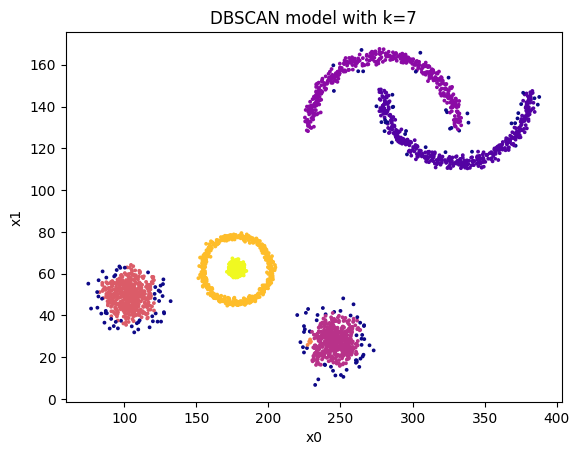

In [7]:
clusters = DBSCAN(eps = 2.5, min_samples =5).fit(X)
labels=clusters.labels_
plt.scatter(X[:, 0], X[:,1], s=3,c = labels, cmap= "plasma") # plotting the clusters
plt.title('DBSCAN model with k=7')
plt.xlabel("x0") # X-axis label
plt.ylabel("x1") # Y-axis label
plt.show()

### The original data, based on the true labels

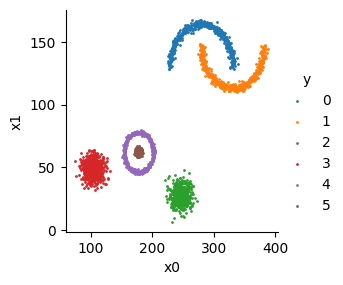

In [8]:
sns.FacetGrid(dataset, hue="y").map(plt.scatter, "x0", "x1",s=1).add_legend()
plt.show()

* I obtained different k values for each task. 
* The clusters that I have obtained from task2 are better, they are closer the original one.
* No, clustering cannot predict the true labels of data as it is an unsupervised learning technique that focuses on grouping similar data points based on their characteristics or similarities, without using true labels. Prediction of true labels typically requires the use of supervised learning techniques such as classification algorithms.
* With our data, DBSCAN algorithm gave a better result because our data has non-globular shapes, the clusters have varying densities.

* K-means relies on the assumption that clusters are globular and have similar sizes and densities. It calculates cluster centers based on mean values, which may not accurately represent irregularly shaped clusters or clusters with varying densities.

* DBSCAN, on the other hand, defines clusters based on local density and connectivity. It can identify clusters of arbitrary shapes and sizes by connecting neighboring points within a specified distance. This flexibility allows DBSCAN to capture clusters that do not conform to the assumptions of K-means. Furthermore, DBSCAN has a built-in mechanism to handle noise and outliers. It classifies isolated points as noise, effectively ignoring them in the clustering process. K-means, by assigning all points to clusters, is more sensitive to the presence of noise and outliers, potentially leading to less accurate cluster assignments.

* In summary, the differences in performance between K-means and DBSCAN in different cases can be attributed to their respective assumptions, flexibility in handling cluster shapes and densities, and ability to handle noise and outliers.
